# Exploratory Data Analysis - Bank Marketing Dataset
### Radomír Čech (CEC0144)

### <b>Informace o datasetu:</b>

Marketingové kampaně portugalské bankovní instituce

Atributy datasetu:
 1. age - věk klienta
 2. job - zaměstnání
 3. marital - manželství
 4. education - vzdělání
 5. default - jedná-li se o úvěr v prodlení
 6. housing - půjčka na bydlení
 7. loan - jedná-li se o půjčku

Atributy, které jsou spojené s poslední komunikací současné kampaně:
 1. contact - typ komunikace
 2. month - poslední měsíc kontaktu
 3. day_of_week - den kontaktu
 4. duration - délka hovoru

Ostatní atributy:
 1. campaign - počet hovorů během kampaně
 2. pdays - počet dnů od poslední kampaně
 3. previous - počet hovorů v minulé kampani
 4. poutcome - výsledek předchozí kampaně

Atributy ze sociálního a ekonomického kontextu:
 1. emp_var_rate - míra změny zaměstnanosti
 2. cons_price_idx - index spotřebilských cen
 3. cons_conf_idx - index spotřebitelské důvěry
 4. euribor3m - euribor 3 měsíční sazba
 5. nr_employed - počet zaměstnanců
 6. subscribed - upsal se k termínovému vkladu

### Import balíčků

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Načtení datasetu a jeho úprava

In [183]:
df = pd.read_csv("bank_marketing_dataset.csv", sep = ',')

# Přejmenování sloupců - tečky kazí syntax pythonu
# df.columns.tolist()
df.rename(columns = {
            "emp.var.rate": "emp_var_rate", 
            "cons.price.idx": "cons_price_idx", 
            "cons.conf.idx": "cons_conf_idx",
            "nr.employed": "nr_employed"
            }, inplace=True)

df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
0          1.1          93.994          -36.4      4.857       5191.0   
1          1.1          93.994          -36.4      4.857       5191.0   
2          1.1          93.994          -36.4      4.857       5191.0   
3          1.1          93.994          -36.4      4.857       5191.0   
4          1.1          93.994          -36.4      4.857       5191.0   
5          1.1          93.994          -36.4      4.857       5191.0   
6          1.1          93.994          -36.4      4.857       5191.0   
7          1.1          93.994          -36.4      4.857       5191.0   
8          1.1          93.994          -36.4      4.857       5191.0   
9          1.1          93.994          -36.4      4.857       5191.0   

   subscribed  
0          no  
1          no  
2          no  
3          no  
4          no  
5          no  
6          no  
7          no  
8          no  
9          no  

[10 rows x 21 columns]

### Kategorické sloupce

In [4]:
cols_categories = df.select_dtypes(exclude=np.number).columns
cols_categories

for col in cols_categories:
    print(col)
    print(df[col].unique().tolist())
    print()

job
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']

marital
['married', 'single', 'divorced', 'unknown']

education
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']

default
['no', 'unknown', 'yes']

housing
['no', 'yes', 'unknown']

loan
['no', 'yes', 'unknown']

contact
['telephone', 'cellular']

month
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']

day_of_week
['mon', 'tue', 'wed', 'thu', 'fri']

poutcome
['nonexistent', 'failure', 'success']

subscribed
['no', 'yes']



### Číselné sloupce


In [5]:
cols_numeric = df.select_dtypes(include=np.number).columns
cols_numeric.tolist()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

### Kontrola nulových dat

Neobsahuje nulová data - počet nenulových dat sedí s počtem celkových dat

In [6]:
df.shape

(41188, 21)

In [7]:
print(df.isnull().count())

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
subscribed        41188
dtype: int64


In [8]:
print(df.isna().count())

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
subscribed        41188
dtype: int64


### Obecný popis dat

Popis číslených hodnot, obsahuje průměry, percentily, počty, minima a maxima

In [9]:
df.describe(include=['number'])

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m   nr_employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Popis kategoriálních hodnot, obsahuje počty, unikátní hodnoty, nejčastější hodnota

In [10]:
df.describe(exclude=['number'])

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome subscribed  
count   41188       41188        41188      41188  
unique     10           5            3          2  
top       may         thu  nonexistent         no  
freq    13769        8623        35563      36548

# Analýza dat

Zobrazení upsaných a neupsaných

In [184]:
df_subscribed = df.groupby("subscribed").subscribed.count().reset_index(name="Count")
df_subscribed

print('Počet upsaných klientů: ' + str(df_subscribed[df_subscribed.subscribed == "yes"].Count.values[0]))

Počet upsaných klientů: 4640


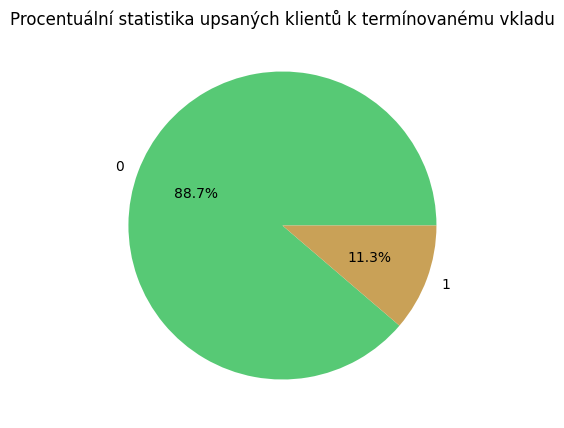

In [182]:
fig = plt.figure(figsize=(10, 5))
patches, texts, autotexts = plt.pie(data=df_subscribed, x="Count", labels="subscribed", autopct='%1.1f%%', colors=['#57c975', '#c9a157'])
fig.set_facecolor('#FFFFFF')
plt.title("Procentuální statistika upsaných klientů k termínovanému vkladu")
plt.show()

Zobrazení počtu klientů podle věku
 - nejvíce klientů je ve věku cca 25 do 47 let, což dává smysl, lidé v tomto věku často potřebují různé půjčky apod.


    age  Count
14   31   1947
15   32   1846
16   33   1833
19   36   1780
18   35   1759
17   34   1745
13   30   1714
20   37   1475
12   29   1453
22   39   1432
21   38   1407
24   41   1278
23   40   1161
25   42   1142
28   45   1103
26   43   1055
29   46   1030
27   44   1011
11   28   1001
31   48    979


Text(0, 0.5, 'Počet')

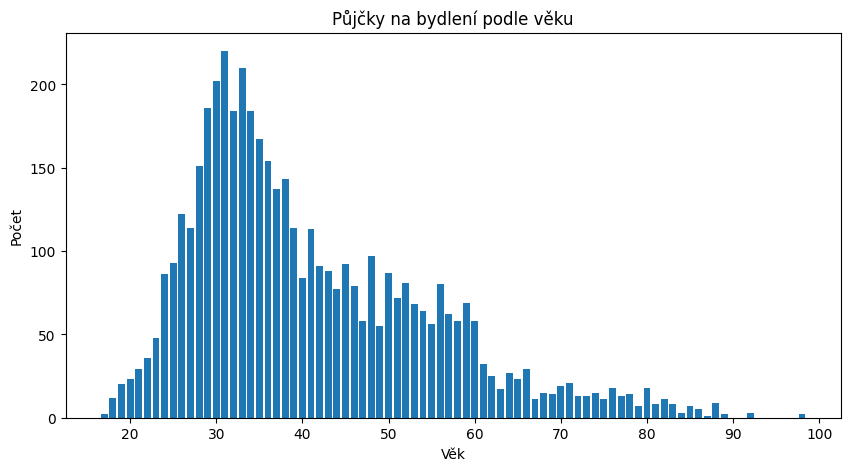

In [186]:
pd.set_option('display.max_rows', 20)
df_age_count = df.groupby("age").age.count().reset_index(name="Count")
print(df_age_count.sort_values(['Count'], ascending=False).head(20))

df_subs = df.loc[df.subscribed == 'yes'].groupby(['age']).subscribed.count().reset_index(name="Count")

fig = plt.figure(figsize=(10, 5))
plt.bar(df_subs.age, df_subs.Count)
plt.title("Upsaných klientů podle věku")
plt.xlabel("Věk")
plt.ylabel("Počet")

Zobrazení upsaných k term. vkladu na boxplotu:
 - u upsaných klientů je průměrný věk kolem 32 do 51 let, nejstarší klient (98 let) lze vidět úplně nahoře jako outlier

<AxesSubplot: xlabel='subscribed', ylabel='age'>

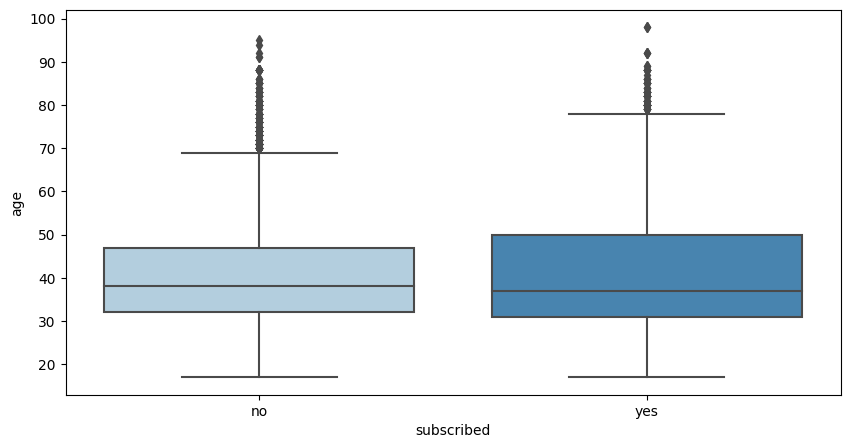

In [187]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data = df, y = 'age', x = 'subscribed', palette='Blues')

Zobrazení a seřazení počtu klientů podle jejich vzdělání a práce
 - nejčastější práce: administrátor a blue-collar (ruční práce)
 - nejčastější vzdělání: univerzitní a vysoká škola
 - vyskytly se i hodnoty `unknown` - nezjištěná hodnota
 - čím vyšší vzdělání klienti mají, tím více se upisují k term. vkladu
 - nejvíce upsaných jsou studenti, retired a nezaměstnaní

              job  Count
0          admin.  10422
1     blue-collar   9254
9      technician   6743
7        services   3969
4      management   2924
5         retired   1720
2    entrepreneur   1456
6   self-employed   1421
3       housemaid   1060
10     unemployed   1014
8         student    875
11        unknown    330

              job          %
8         student  31.428571
5         retired  25.232558
10     unemployed  14.201183
0          admin.  12.972558
4      management  11.217510
11        unknown  11.212121
9      technician  10.826042
6   self-employed  10.485574
3       housemaid  10.000000
2    entrepreneur   8.516484
7        services   8.138070
1     blue-collar   6.894316

             education  Count
6    university.degree  12168
3          high.school   9515
2             basic.9y   6045
5  professional.course   5243
0             basic.4y   4176
1             basic.6y   2292
7              unknown   1731
4           illiterate     18


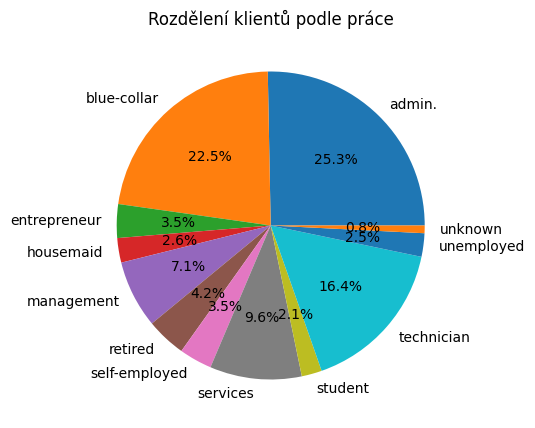

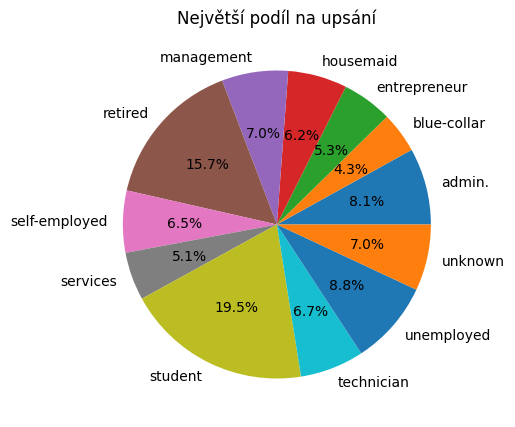

<AxesSubplot: xlabel='Count', ylabel='education'>

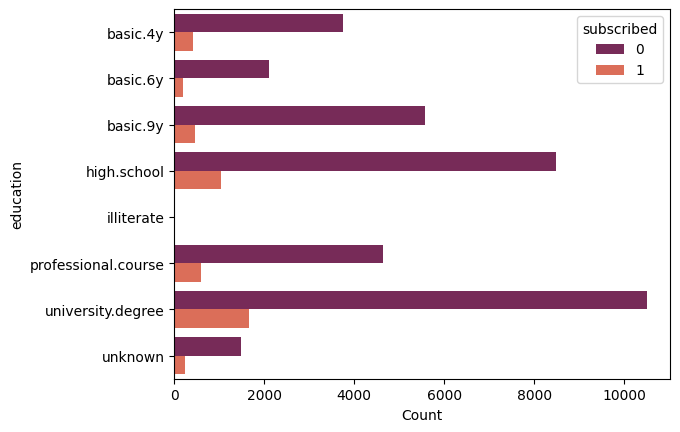

In [149]:
df_job = df.groupby(['job']).job.count().reset_index(name="Count")
df_job_percentile = df.groupby(['job']).subscribed.mean().multiply(100).reset_index(name="%")
print(df_job.sort_values(['Count'], ascending=False))
print()
print(df_job_percentile.sort_values(['%'], ascending=False))
print()

df_education = df.groupby(['education']).education.count().reset_index(name="Count")
print(df_education.sort_values(['Count'], ascending=False))

fig = plt.figure(figsize=(10, 5))
patches, texts, autotexts = plt.pie(data=df_job, x="Count", labels="job", autopct='%1.1f%%')
fig.set_facecolor('#FFFFFF')
plt.title("Rozdělení klientů podle práce")
plt.show()

fig = plt.figure(figsize=(10, 5))
patches, texts, autotexts = plt.pie(data=df_job_percentile, x="%", labels="job", autopct='%1.1f%%')
fig.set_facecolor('#FFFFFF')
plt.title("Největší podíl na upsání")
plt.show()

sns.barplot(data=df.groupby(['education', 'subscribed']).education.count().reset_index(name="Count"), y='education', x='Count', hue='subscribed', palette='rocket')

Ostatní data
 - nejstarší klient: 98 let
 - nejmladší klient: 17 let
 - průměrný věk klienta: 41 let


In [99]:
df.loc[(df.subscribed == "yes")].describe()

age     duration     campaign        pdays     previous  \
count  4640.000000  4640.000000  4640.000000  4640.000000  4640.000000   
mean     40.913147   553.191164     2.051724   792.035560     0.492672   
std      13.837476   401.171871     1.666245   403.407181     0.860344   
min      17.000000    37.000000     1.000000     0.000000     0.000000   
25%      31.000000   253.000000     1.000000   999.000000     0.000000   
50%      37.000000   449.000000     2.000000   999.000000     0.000000   
75%      50.000000   741.250000     2.000000   999.000000     1.000000   
max      98.000000  4199.000000    23.000000   999.000000     6.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx    euribor3m  nr_employed  
count   4640.000000     4640.000000    4640.000000  4640.000000  4640.000000  
mean      -1.233448       93.354386     -39.789784     2.123135  5095.115991  
std        1.623626        0.676644       6.139668     1.742598    87.572641  
min       -3.400000       92.201000     -50.800000     0.634000  4963.600000  
25%       -1.800000       92.893000     -46.200000     0.849000  5017.500000  
50%       -1.800000       93.200000     -40.400000     1.266000  5099.100000  
75%       -0.100000       93.918000     -36.100000     4.406000  5191.000000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

### Zobrazení "mladé" generace:
 - většina mladých (do 28 let) se neupsala k term. vkladu
 - upsalo se pouze 736 mladých klientů
 - poměr mezi neupsanými a upsanými není nijak moc rozdílný
 - nejvíce upsaných je kolem věku 30-32

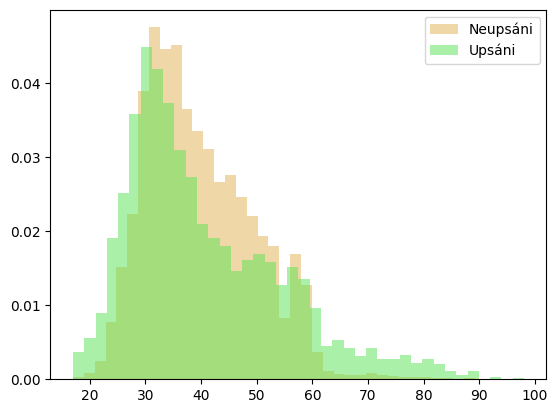

Text(0, 0.5, 'Počet')

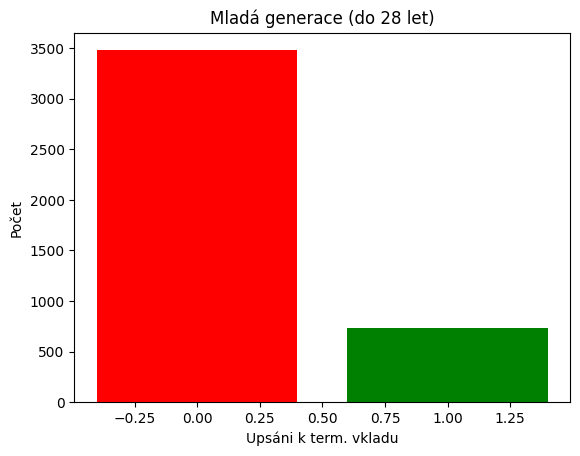

In [170]:
age_yes = df[df.subscribed == 1].iloc[:,:1]
age_no = df[df.subscribed == 0].iloc[:,:1]

age_yes = np.array(age_yes)
age_no = np.array(age_no)

plt.hist(age_no, density=True, bins=40, color="#e3b052",alpha=0.5, label="Neupsáni")
plt.hist(age_yes,density=True, bins=40,color="#57e352",alpha=0.5, label="Upsáni")
plt.legend(loc='upper right')
plt.show()

df_young_subscribed = df.loc[df.age <= 28]
df_young_subscribed = df_young_subscribed.value_counts("subscribed").reset_index(name="Count")

plt.bar(df_young_subscribed.subscribed, df_young_subscribed.Count, color=['red', 'green'])
plt.title("Mladá generace (do 28 let)")
plt.xlabel("Upsáni k term. vkladu")
plt.ylabel("Počet")

### Zobrazení starší generace

- až 45% lidí v kategorii "Senior" se upsalo

Text(0.5, 1.0, 'Počty upsání podle generace')

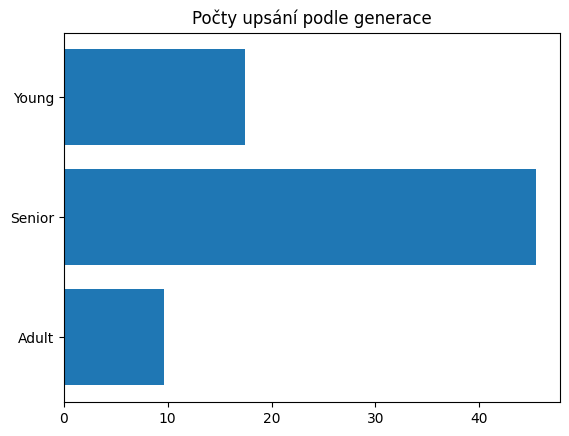

In [188]:
df['subscribed'] = df.apply(lambda row: 1 if row["subscribed"] == "yes" else 0, axis=1)

df.loc[:, "generation"] = "Young"
df.loc[(df.age >= 60), "generation"] = "Senior"
df.loc[(df.age > 28) & (df.age <= 60), "generation"] = "Adult"

g = df.groupby("generation").subscribed.mean().multiply(100).reset_index(name="Mean")

plt.barh(g.generation, g.Mean)
plt.title("Počty upsání podle generace")

### Zobrazení počtů půjček na bydlení podle věku

- Zde lze hezky vidět, že půjčky na bydlení si nejvíce žádají lidé ve věku 28 - 40 let

    age  Count
14   31   1039
15   32    983
16   33    972
19   36    950
18   35    934
..  ...    ...
0    17      3
74   98      2
71   89      1
72   91      1
73   92      1

[75 rows x 2 columns]



Text(0, 0.5, 'Počet')

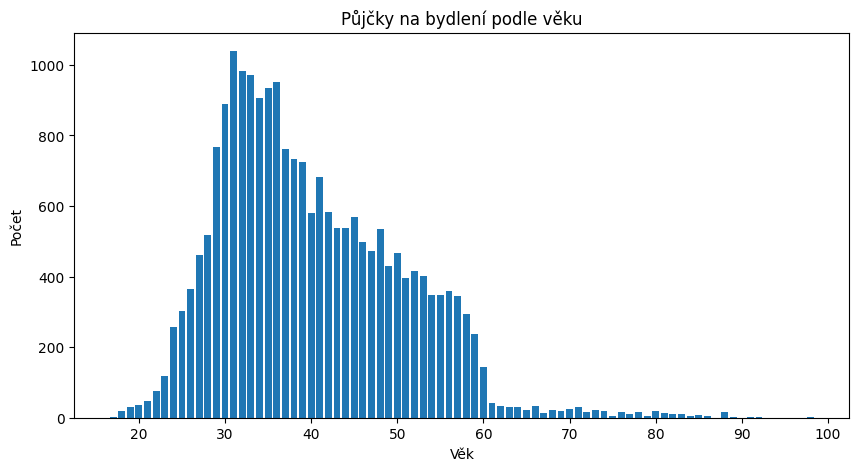

In [122]:
df_housing = df.loc[df.housing == 'yes'].groupby(['age']).housing.count().reset_index(name="Count")
print(df_housing.sort_values(['Count'], ascending=False))
print()

fig = plt.figure(figsize=(10, 5))
plt.bar(df_housing.age, df_housing.Count)
plt.title("Půjčky na bydlení podle věku")
plt.xlabel("Věk")
plt.ylabel("Počet")

Zobrazení poměru upsání/neupsání, když mají půjčku na bydlení

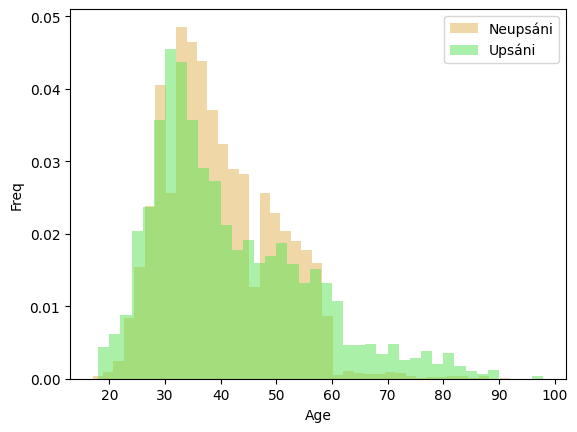

In [193]:
age_yes = df[(df.subscribed == 1) & (df.housing == "yes")].iloc[:,:1]
age_no = df[(df.subscribed == 0) & (df.housing == "yes")].iloc[:,:1]

age_yes = np.array(age_yes)
age_no = np.array(age_no)

plt.hist(age_no, density=True, bins=40, color="#e3b052",alpha=0.5, label="Neupsáni")
plt.hist(age_yes,density=True, bins=40,color="#57e352",alpha=0.5, label="Upsáni")
plt.legend(loc='upper right')
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

### Další kategorické analýzy


- jak již bylo řečeno minule, největší zastoupení mají klienti s prací admin a blue-collar
- nejvíce služeb si vyžádali lidé, kteří jsou vdaní nebo ženatí
- nejvíce služeb si vyžádali lidé, kteří mají vysoké vzdělání (čím vyšší vzdělání, tím větší počet služeb)
- velký počet poskytnutých služeb nebyly půjčky
- nejúspěšnější měsíc pro banku byl květen
- banka neposkytovala služby o víkendu, všechny pracovní dny jsou na tom přibližně "stejně"
- velká většina klientů v bance je nových (nebyli předtím kontaktováni)

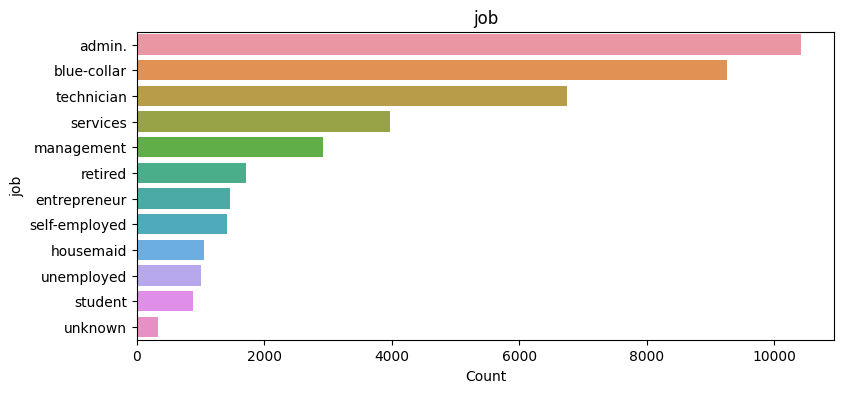

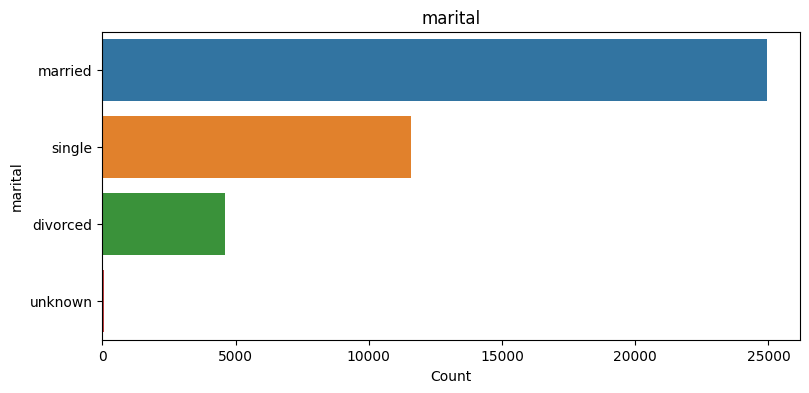

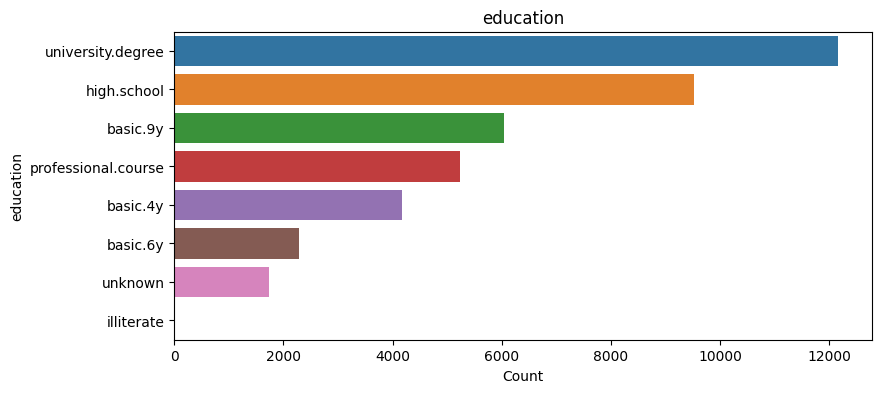

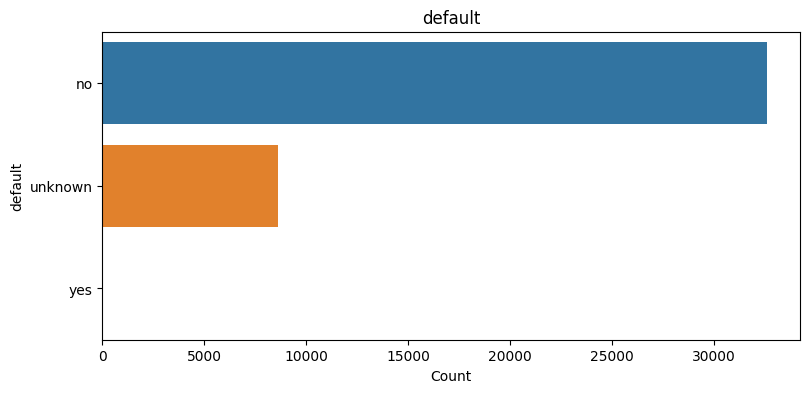

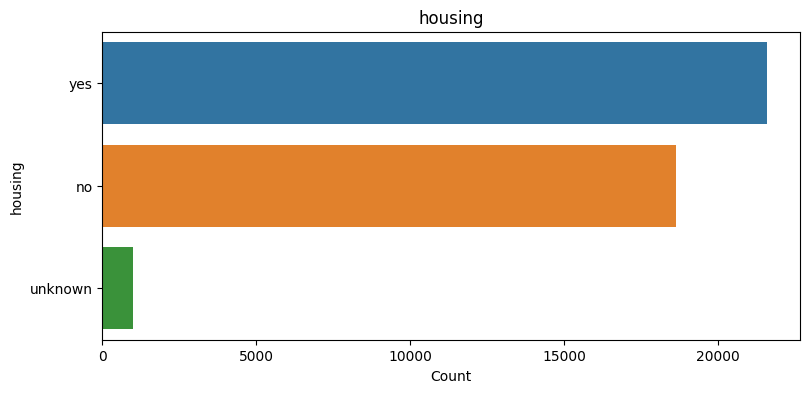

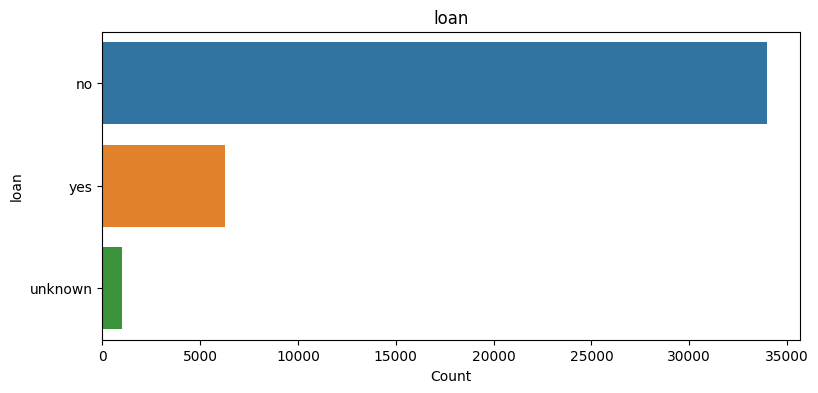

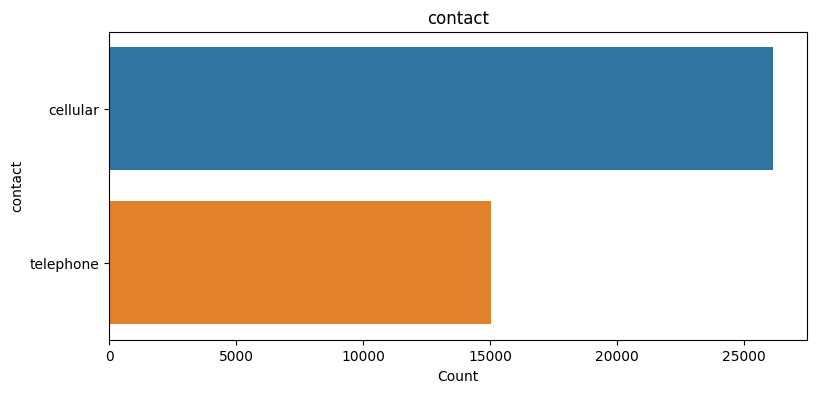

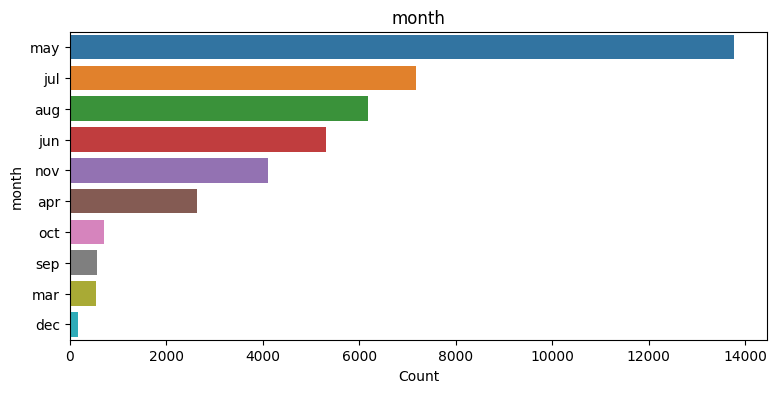

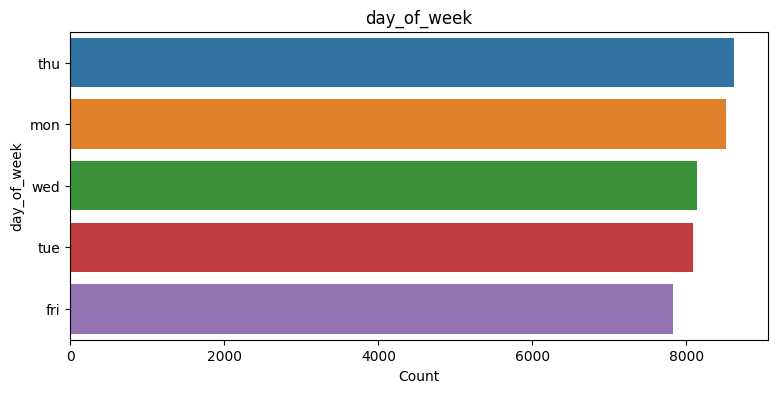

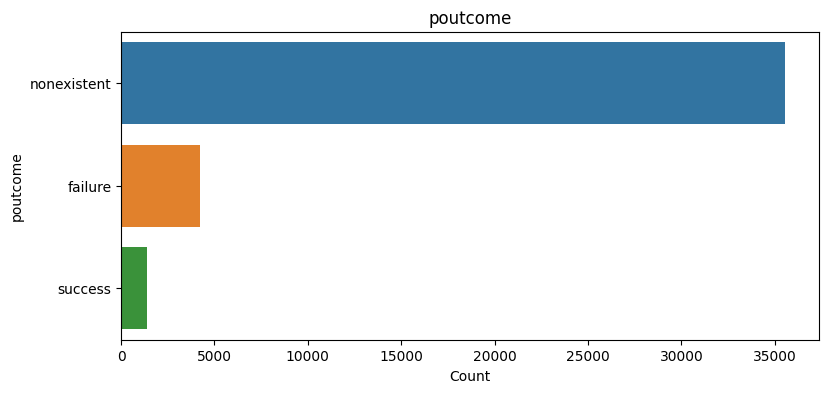

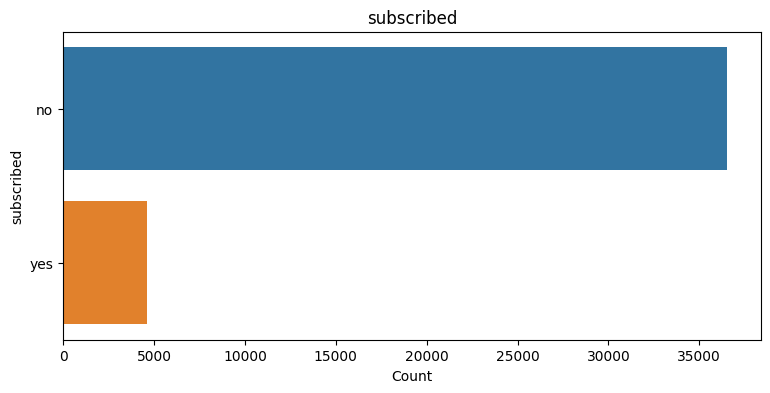

In [110]:
for cat in df.select_dtypes(exclude=np.number).columns:
    plt.figure(figsize=(9, 4))
    tmp = df.value_counts(cat).reset_index(name="Count")
    sns.barplot(data=tmp, x= 'Count', y= cat).set_title(cat)
    plt.show()

### Zobrazení korelací

Červená barva znázorňuje silnou korelaci

Modrá barva znázorňuje slabou/žádnou korelaci

Bílá barva znázorňuje běžnou hodnotu

Nalezené korelace:
- mezi `euribor3m` a `nr_employed`
- mezi `euribor3m` a `emp_var_rate`
- mezi `nr_employed` a `emp_var_rate`
- mezi `cons_price_idx` a `emp_var_rate`

/tmp/ipykernel_3525/840997470.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


<AxesSubplot: >

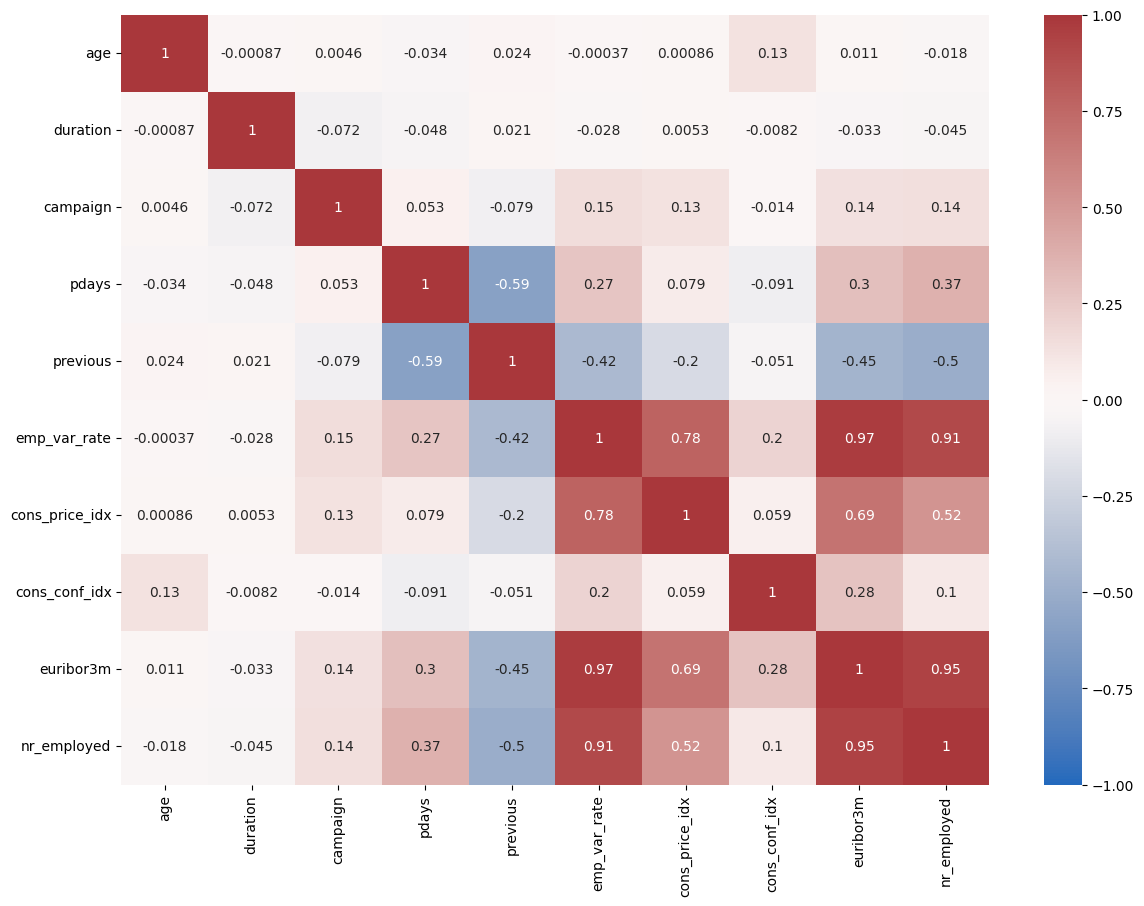

In [126]:
cor_mat=df.corr()
fig = plt.figure(figsize=(14,10))
sns.heatmap(cor_mat,annot=True, cmap='vlag', vmin=-1,vmax=1)

### Zobrazení korelací ekonomických a sociálních indexů

`euribor3m` roste téměř vždy, když hodnoty `cons_price_idx`, `nr_employed` a `emp_var_rate` rostou

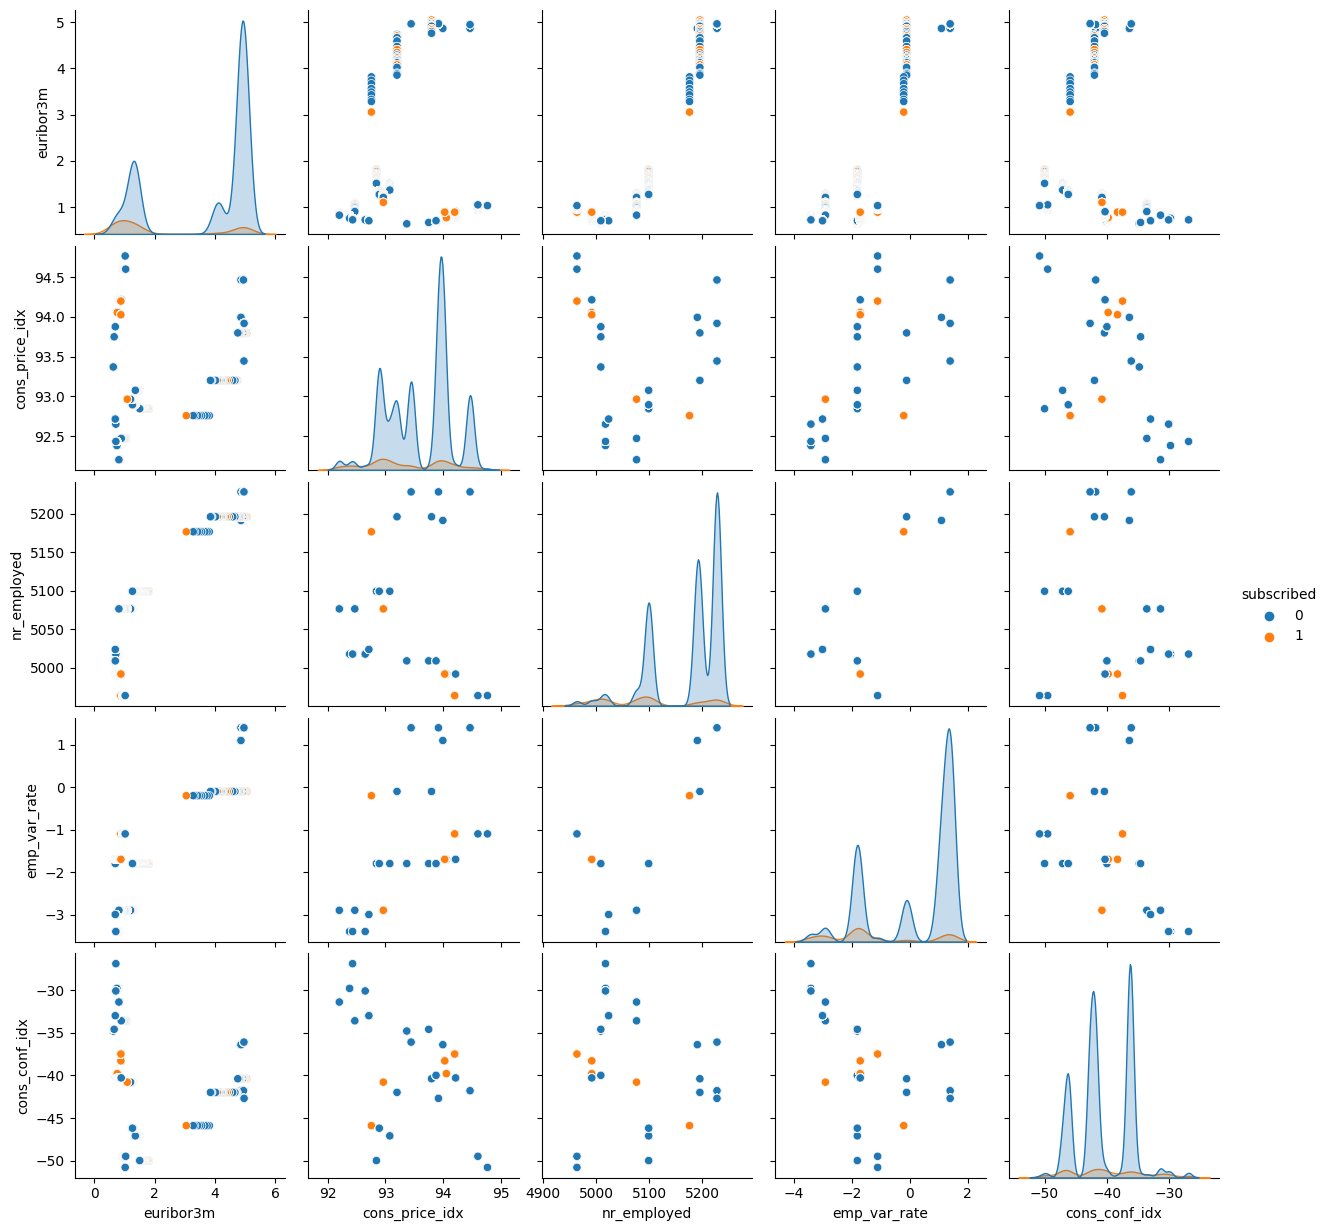

In [150]:
idxs = ["euribor3m","cons_price_idx", "nr_employed", "subscribed", "emp_var_rate", "cons_conf_idx"]
sns.pairplot(df[idxs], hue="subscribed")
plt.show()

### Zobrazení histogramů (pouze číselné hodnoty)

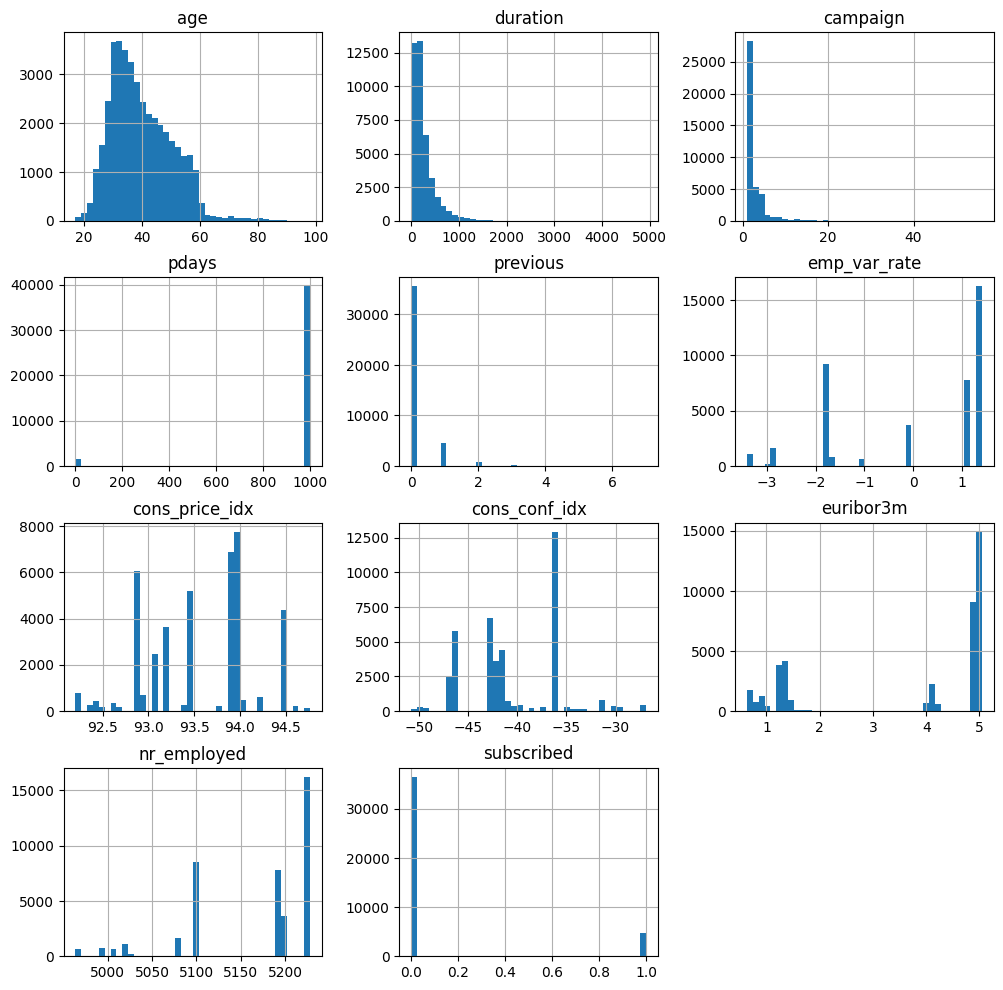

In [160]:
cols = df.select_dtypes(include=np.number).columns
df[cols].hist(figsize=(12,12),bins=40)
plt.show()

### Zobrazení boxplotů (pouze číselné hodnoty)

- převážně se upisovali ti klienti, kteří hovořili déle
- hodně klientů, kteří už jsou obeznámeni s bankou, se častěji upisovali

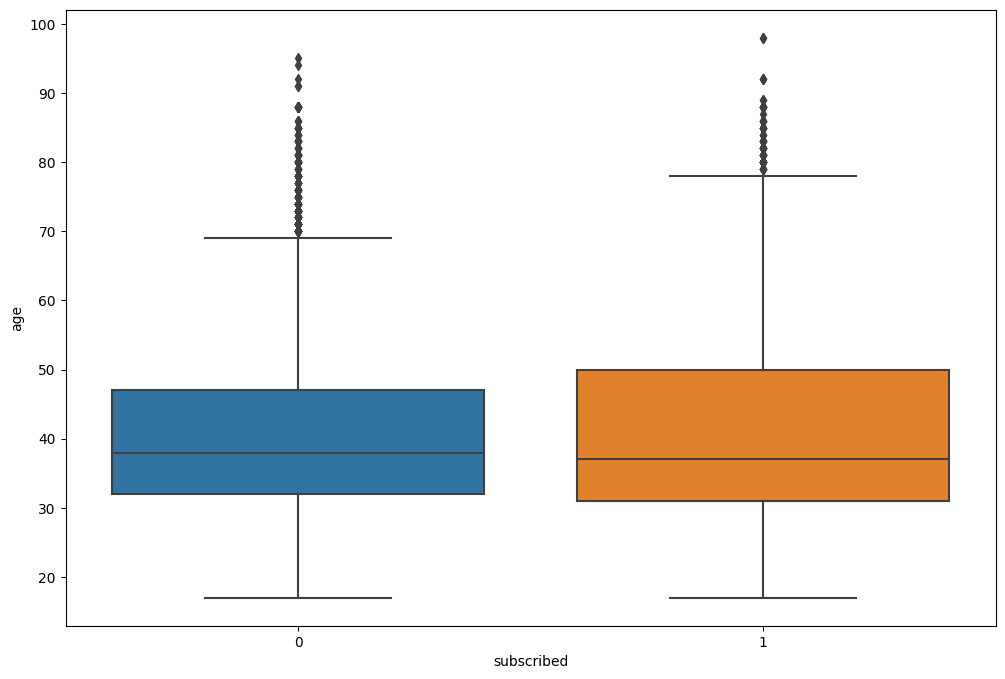

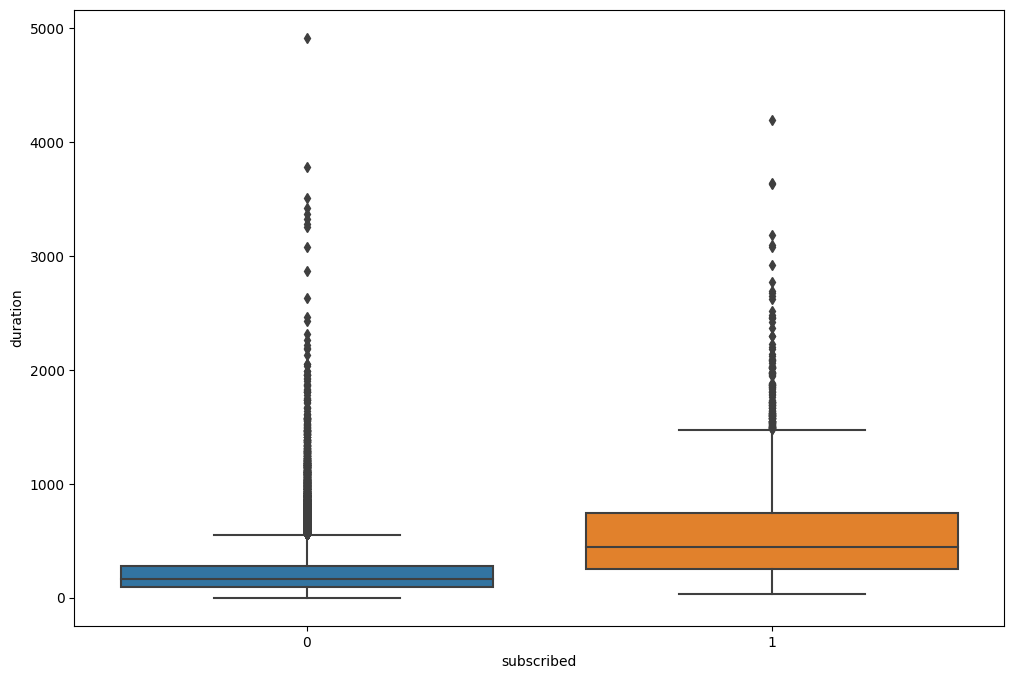

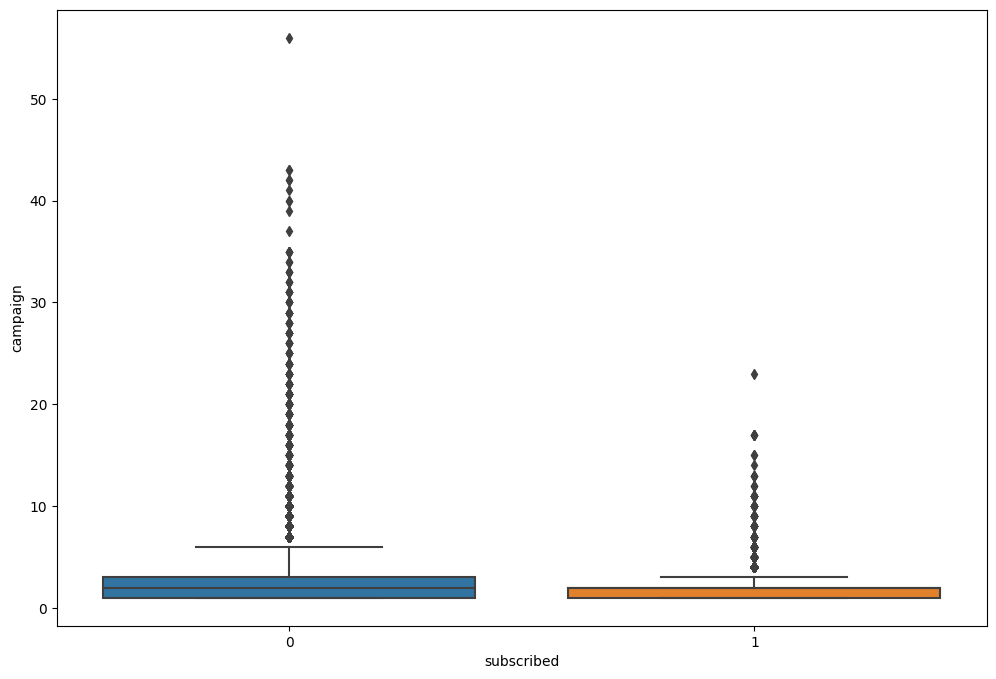

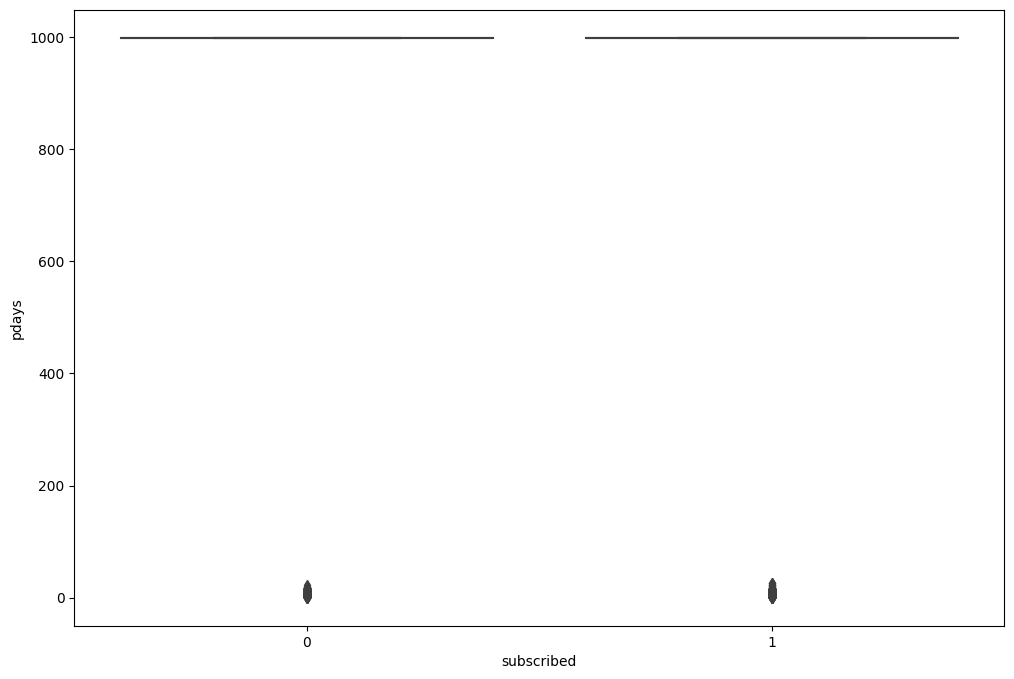

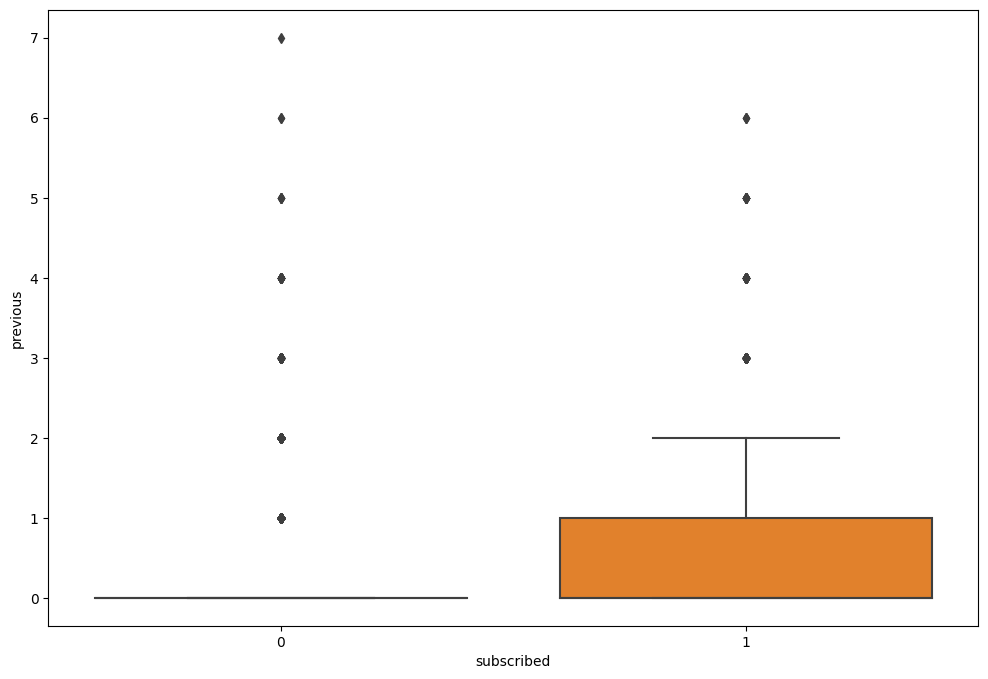

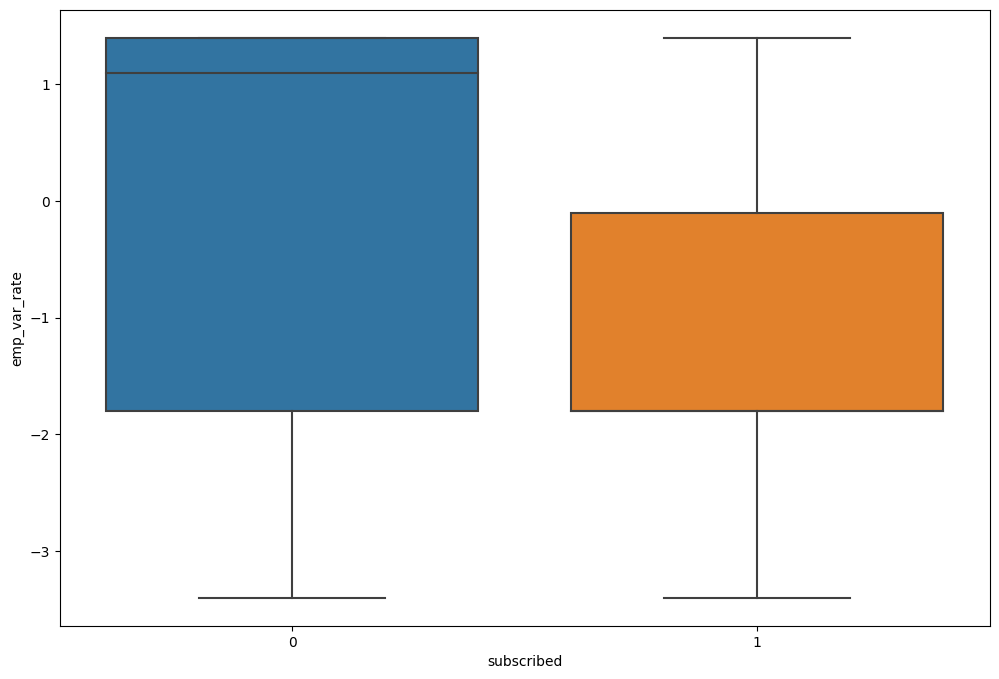

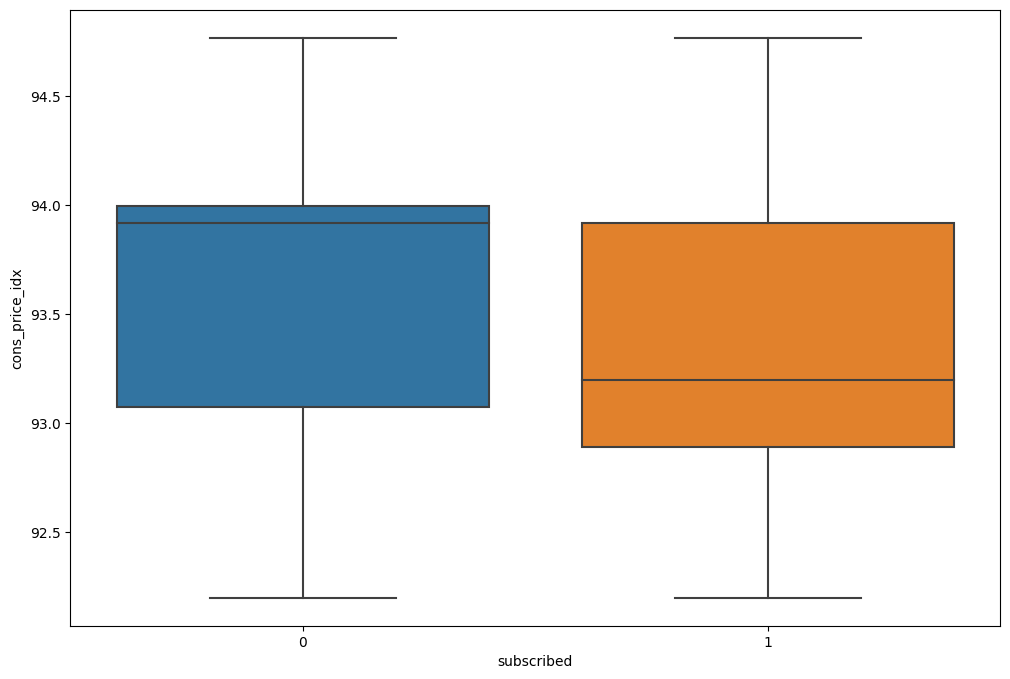

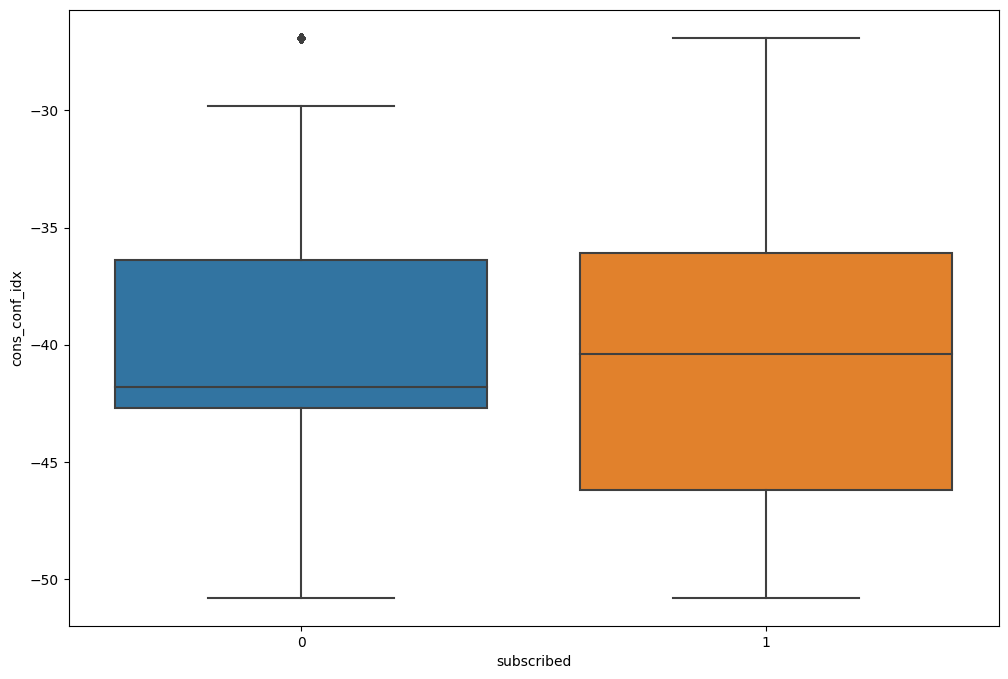

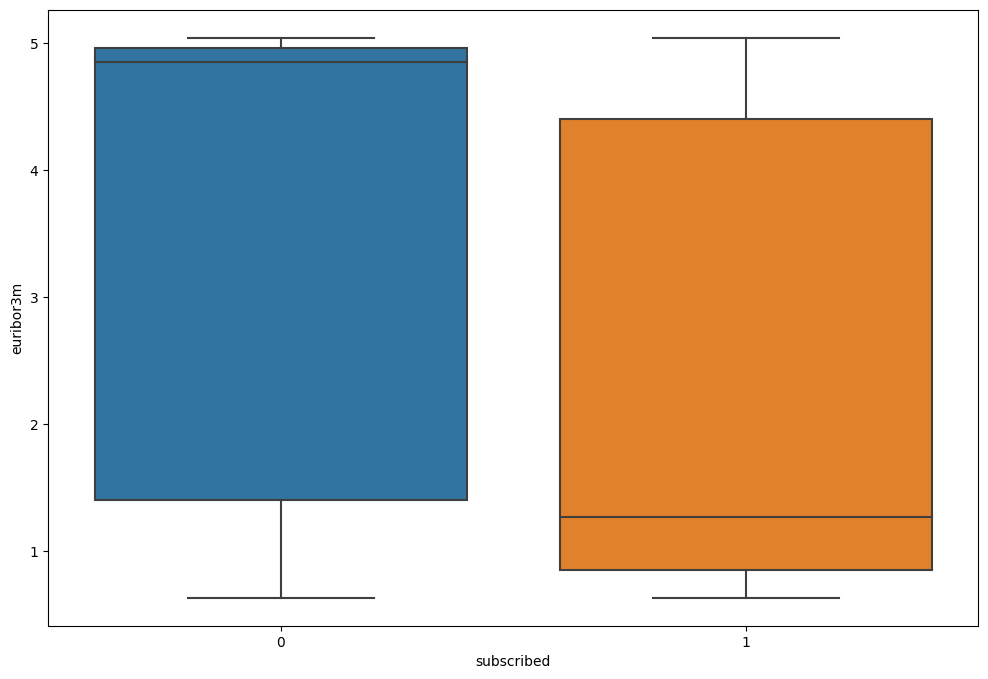

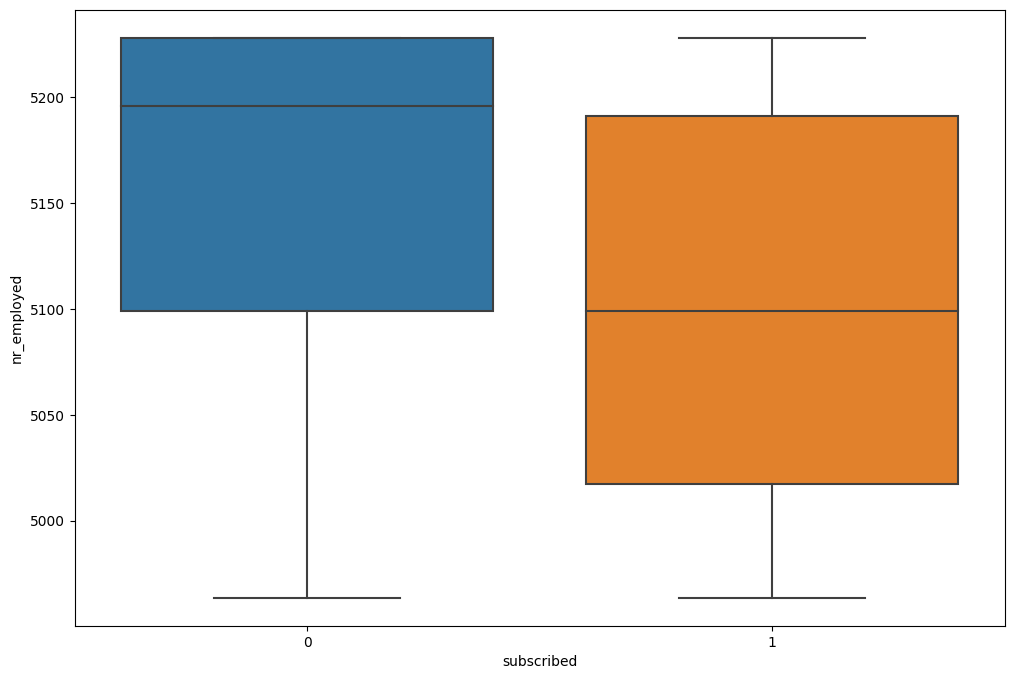

In [162]:
for col in df.select_dtypes(include=np.number).columns.drop('subscribed'):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x="subscribed", y=df[col])
    plt.show()

### Jiné zajímavosti

- až 99,9% klientů má `pdays` hodntou 999, může se jednat o ty, kteří ještě nebyli kontaktováni

In [173]:
df_job = df.groupby(['pdays']).pdays.count().reset_index(name="Count")
df_job_percentile = df.groupby(['pdays']).pdays.mean().divide(10).reset_index(name="%")
print(df_job.sort_values(['Count'], ascending=False))
print()
print(df_job_percentile.sort_values(['%'], ascending=False))
print()

    pdays  Count
26    999  39673
3       3    439
6       6    412
4       4    118
9       9     64
..    ...    ...
21     21      2
20     20      1
23     25      1
24     26      1
25     27      1

[27 rows x 2 columns]

    pdays     %
26    999  99.9
25     27   2.7
24     26   2.6
23     25   2.5
22     22   2.2
..    ...   ...
4       4   0.4
3       3   0.3
2       2   0.2
1       1   0.1
0       0   0.0

[27 rows x 2 columns]



- nenašel se žádný klient, který by měl úvěr v prodlení - `default` == yes

<Figure size 900x600 with 0 Axes>

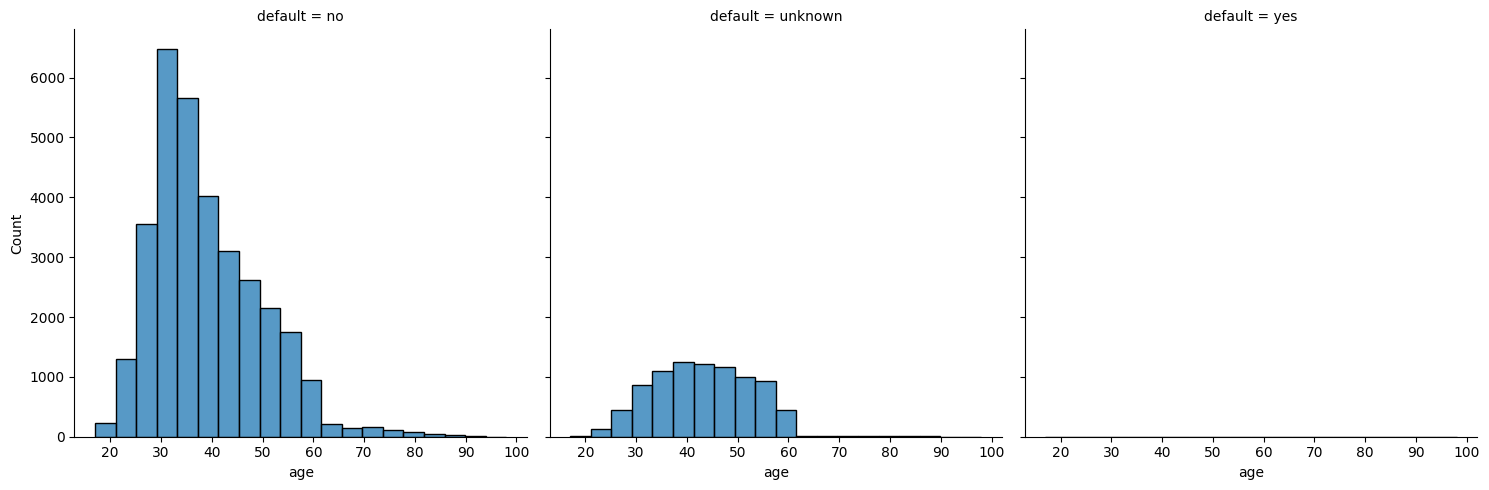

In [174]:
fig = plt.figure(figsize=(9,6))
sns.displot(data = df, x = 'age', bins=20, col='default')

- zobrazení "úspěšnosti" v měsících

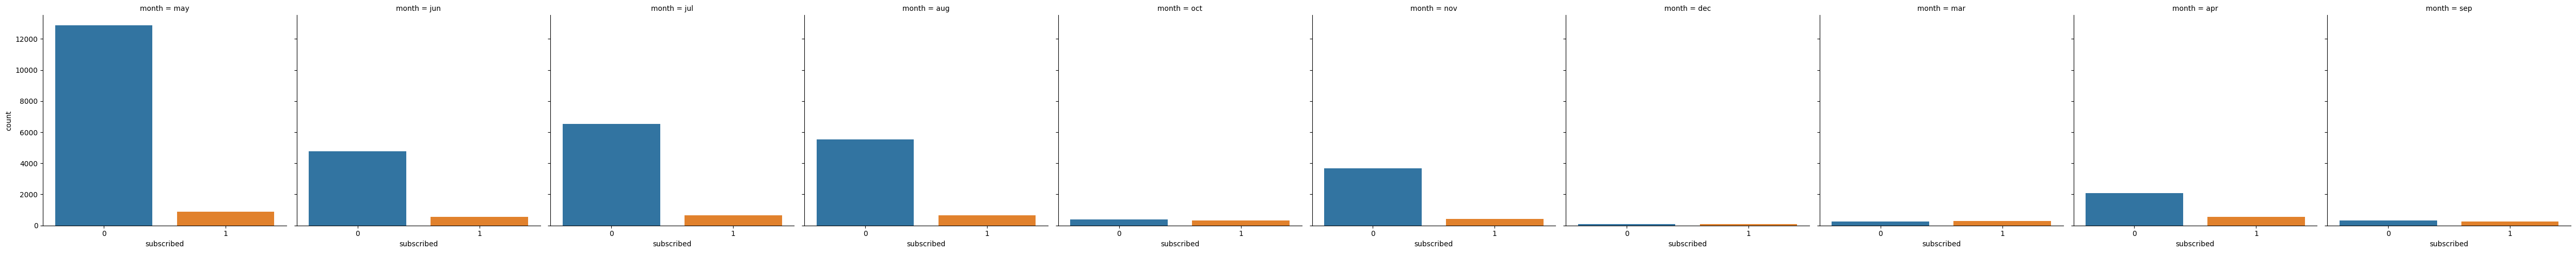

In [177]:
sns.catplot(data=df, x="subscribed", col='month', kind="count")
plt.show()

- zobrazení statusu manželství

subscribed  marital 
0           divorced     4136
            married     22396
            single       9948
            unknown        68
1           divorced      476
            married      2532
            single       1620
            unknown        12
dtype: int64


<AxesSubplot: xlabel='Count', ylabel='marital'>

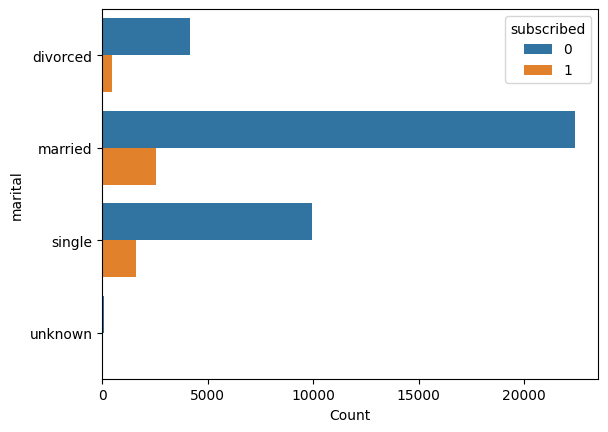

In [179]:
print(df.groupby(['subscribed', 'marital']).size())

df_marital = df.groupby(['marital', 'subscribed']).marital.count().reset_index(name="Count")
sns.barplot(data=df_marital, y='marital', x='Count', hue='subscribed')

# Závěr

Dataset je celkem rozsáhlý a očekával některé mé předtuchy, očekával jsem, že studenti budou mít velký podíl na upsání. Nečekal jsem ale, že zrovna u "seniorů" bude největší poměr upsání.

Získané poznatky:
- Nejvíce upsaných jsou studenti, nezaměstnaní a retired
- Nejčastěji byli kontaktování admin., blue-collar a technician
- Velký podíl mají klienti, kteří nebyli v minulosti kontaktování - jsou noví (mají `pdays` = 999)
- Většina klientů, kteří se už v minulosti upsali, se upsali i v nové kampani
- Nejvíce klientů bylo kontaktovaných v květnu, naopak nejméně bylo v prosinci
- Nejvíce upsaných je ženatých/vdaných
- Nejvíce půjček na bydlení bylo poskytnuto lidem ve věku 30-40 let
- Velkou část tvoří klienti 30-55 let
- Největší poměr upsaných klientů tvoří klienti v kategorii `Senior`
- Nejvíce upsání proběhlo u vdaných/ženatých, naopak nejméně u rozvedených, tento `marital` nehraje roli na upsání/neupsání